In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
def plot_map(lon,lat,data,file_name):
    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=np.min(lat), urcrnrlat=np.max(lat),
            llcrnrlon=np.min(lon), urcrnrlon=np.max(lon), )
    m.drawcoastlines()
    #plt.show()
    lons,lats= np.meshgrid(lon,lat)
    x,y = m(lons,lats)
    
    m.drawcoastlines()
    levels = np.linspace(min(np.unique(data)),max(np.unique(data)),21)
    #levels=[-30,-20,-12,-9,-6,-2,-1,+1,+2,+6,+9,+12,+20,+30]
    temp = m.contourf(x,y,data,levels=levels,cmap='seismic')
    cb = m.colorbar(temp,"bottom", size="15%", pad="10%")
    #m.drawcoastlines()
    plt.title('sst')
    cb.set_label('sst')

    #plt.savefig('../Data/output/'+file_name)
    


    plt.show()
    plt.clf()

In [16]:
tos=tos.fillna(0)

In [20]:
tos['lat'].values

array([-88.125, -84.375, -80.625, -76.875, -73.125, -69.375, -65.625,
       -61.875, -58.125, -54.375, -50.625, -46.875, -43.125, -39.375,
       -35.625, -31.875, -28.125, -24.375, -20.625, -16.875, -13.125,
        -9.375,  -5.625,  -1.875,   1.875,   5.625,   9.375,  13.125,
        16.875,  20.625,  24.375,  28.125,  31.875,  35.625,  39.375,
        43.125,  46.875,  50.625,  54.375,  58.125,  61.875,  65.625,
        69.375,  73.125,  76.875,  80.625,  84.375,  88.125])

In [72]:
import netCDF4 as nc
trY_SST_ds=nc.Dataset('tos_GFDL_resize.nc')#"../Data/tos_GFDL_resize_mask.nc")
trY_SST=trY_SST_ds.variables['tos'][:,:,:].filled(0)
trY_SST_anom=trY_SST.reshape(500,12,48,144)-np.expand_dims(trY_SST.reshape(500,12,48,144).mean(1),1)
trY_SST_anom=trY_SST_anom.reshape(1,6000,48,144)


trY_SST=np.nan_to_num(trY_SST,0)

In [87]:
import xarray as xr
trY_SST_ds=xr.open_dataset('tos_GFDL_resize.nc')
trY_SST_ds=trY_SST_ds.fillna(0)
trY_SST=trY_SST_ds['tos'].values
trY_SST_anomaly=trY_SST.reshape(500,12,48,144)-trY_SST.reshape(500,12,48,144).mean(0)
trY_SST_anomaly=trY_SST_anomaly.reshape(1,trY_SST_anomaly.shape[0]*trY_SST_anomaly.shape[1],48,144)
#tos_anomaly.fill(0)
trY_SST_anomaly

array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-3.86288881e-01, -8.00182581e-01, -8.46755326e-01, ...,
          -9.52279568e-03, -2.49592066e-02, -8.32372904e-02],
         [ 6.25813007e-03,  4.79614735e-03,  1.16157532e-03, ...,
          -1.23465061e-03,  1.91736221e-03,  4.80496883e-03],
         [ 3.82900238e-04,  2.21121311e-03,  3.94606590e-03, ...,
          -3.96859646e-03, -2.54487991e-03, -1.14345551e-03]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e

In [61]:
from eofs.standard import Eof


def EOF(Data, lat, lon):
    wgts   = np.cos(np.deg2rad(lat))
    wgts   = wgts.reshape(len(wgts), 1)
    #solver1 = Eof(np.array(ser_original[6]), weights=wgts)

    coslat = np.cos(np.deg2rad(lat))
    wgts = np.sqrt(coslat)[..., np.newaxis]
    solver =Eof(Data,weights=wgts)
    eof1=solver.eofs()

    pc=solver.pcs(pcscaling=1)
    varfrac=solver.varianceFraction()
    lambdas=solver.eigenvalues()


    parallels = np.arange(-90,90,20)
    meridians = np.arange(-180,180,40)

    fig=plt.figure(figsize=(10,16)) 

    m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
            urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
    x, y = m(*np.meshgrid(lon,lat))
    clevs = np.linspace(-0.1,0.1,11)

    cs = m.contourf(x,y,eof1[0,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
    m.drawcoastlines()
    m.fillcontinents(color='#000000',lake_color='#99ffff')
    m.drawparallels(parallels,labels=[1,0,0,0])
    m.drawmeridians(meridians,labels=[1,0,0,1])

    cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
    #cb.set_label('EOF', fontsize=10)
    plt.title('EOF1', fontsize=15)  
    plt.show()

In [89]:
trY_SST_anomaly

array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-3.86288881e-01, -8.00182581e-01, -8.46755326e-01, ...,
          -9.52279568e-03, -2.49592066e-02, -8.32372904e-02],
         [ 6.25813007e-03,  4.79614735e-03,  1.16157532e-03, ...,
          -1.23465061e-03,  1.91736221e-03,  4.80496883e-03],
         [ 3.82900238e-04,  2.21121311e-03,  3.94606590e-03, ...,
          -3.96859646e-03, -2.54487991e-03, -1.14345551e-03]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e

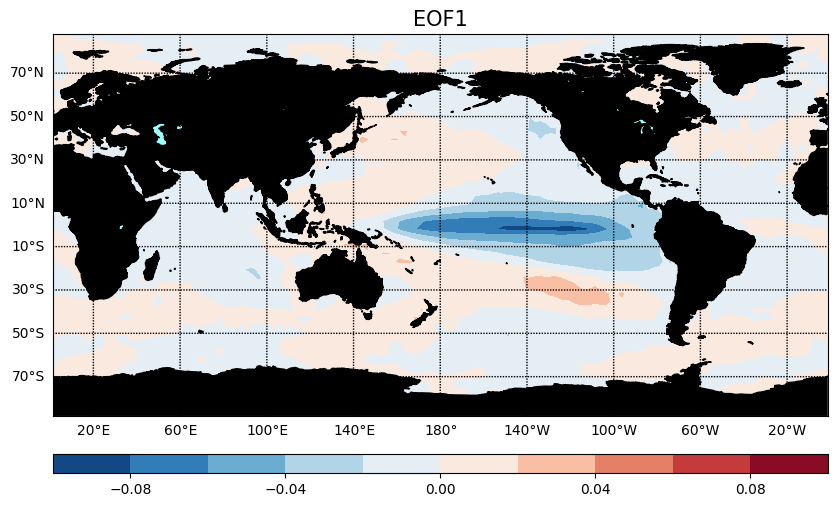

In [88]:
EOF(trY_SST_anomaly[0][:500,:,:],tos['lat'].values,tos['lon'].values)

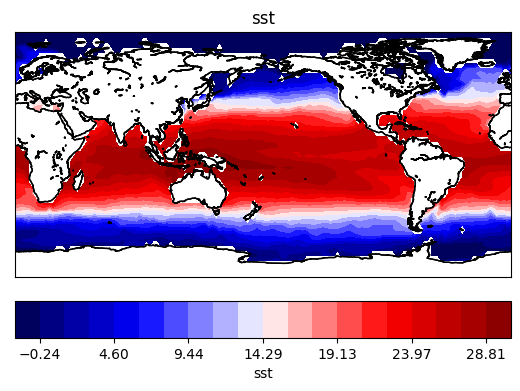

<Figure size 640x480 with 0 Axes>

In [25]:
import xarray as xr
mask = xr.open_dataset('tos_GFDL_resize.nc')
plot_map(mask['lon'].values,mask['lat'].values,mask['tos'].values[0],'file.png')

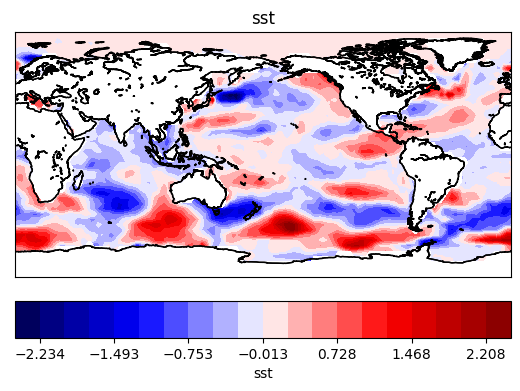

<Figure size 640x480 with 0 Axes>

In [10]:
import xarray as xr
ds = xr.open_dataset('tos_Omon_GISS-E2-1-H_historical_r10i1p1f1_gn_185001-190012_anom.nc')
plot_map(ds['lon'].values,ds['lat'].values,ds['tos'].values[0],'file.png')

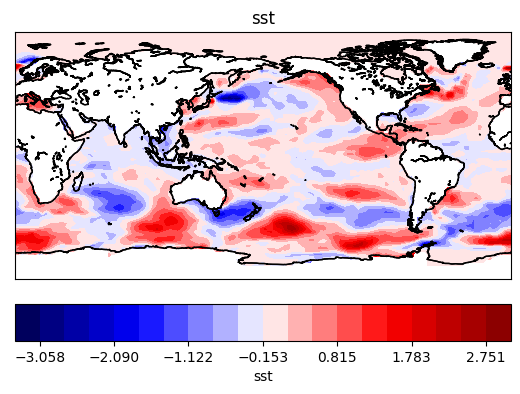

<Figure size 640x480 with 0 Axes>

In [11]:
import xarray as xr
ds = xr.open_dataset('tos_Omon_GISS-E2-1-H_historical_r10i1p1f1_gn_185001-190012_full_anom.nc')
plot_map(ds['lon'].values,ds['lat'].values,ds['tos'].values[0],'file.png')

In [15]:
!pip install eofs

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
    --------------------------------------- 0.0/1.1 MB 162.5 kB/s eta 0:00:07
   - -------------------------------------- 0.0/1.1 MB 217.9 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.1 MB 416.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.1/1.1 MB 514.3 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.1 MB 700.2 kB/s eta 0:00:02
   ----------- ---------------------------- 0.3/1.1 MB 948.8 kB/s eta 0:00:01
   --------------------- ------------------ 0.6/1.1 MB 1.5 MB/s eta 0:00:01
   -------------------------- ------------- 0.7/1.1 MB 1.7 MB/s eta 0:00:01
   ------------------------------------- -- 1.0/1.1 MB 2.1 MB/s eta 0:00:01
   ------------------------------------- -- 1.0/1.1 MB 2.1 MB/s eta 0:00:01
   ------------------

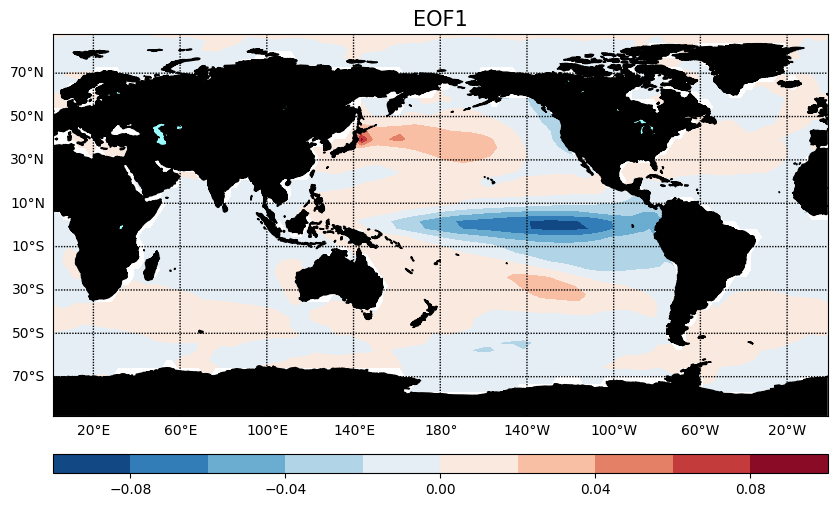

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.ma as ma
from netCDF4 import Dataset
from eofs.standard import Eof
from mpl_toolkits.basemap import Basemap
#import xlwt
#from xlwt import Workbook
import xlsxwriter

data1=Dataset('tos_Omon_GISS-E2-1-H_historical_r10i1p1f1_gn_185001-190012_anom.nc', 'r')  #### also check the EOF of GISS_mask.nc anomalies.

d20=data1.variables['tos'][:]

lat = data1.variables['lat'][:]
lon = data1.variables['lon'][:]


coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver =Eof(d20,weights=wgts)
eof1=solver.eofs()

pc=solver.pcs(pcscaling=1)
varfrac=solver.varianceFraction()
lambdas=solver.eigenvalues()


parallels = np.arange(-90,90,20)
meridians = np.arange(-180,180,40)

fig=plt.figure(figsize=(10,16)) 

m=Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat),
          urcrnrlon=max(lon), urcrnrlat=max(lat), resolution='l')
x, y = m(*np.meshgrid(lon,lat))
clevs = np.linspace(-0.1,0.1,11)

cs = m.contourf(x,y,eof1[0,:,:].squeeze(),clevs,cmap=plt.cm.RdBu_r)
m.drawcoastlines()
m.fillcontinents(color='#000000',lake_color='#99ffff')
m.drawparallels(parallels,labels=[1,0,0,0])
m.drawmeridians(meridians,labels=[1,0,0,1])

cb=m.colorbar(cs, 'bottom', size='5%',pad='10%')
#cb.set_label('EOF', fontsize=10)
plt.title('EOF1', fontsize=15)  
plt.show()

In [32]:
folder_list=['tos_Omon_EC-Earth3-CC_historical_r1i1p1f1',
           'tos_Omon_EC-Earth3-CC_historical_r4i1p1f1',
           'tos_Omon_EC-Earth3-CC_historical_r6i1p1f1',
           'tos_Omon_EC-Earth3-CC_historical_r7i1p1f1',
            'tos_Omon_EC-Earth3-CC_historical_r8i1p1f1',
            'tos_Omon_EC-Earth3-CC_historical_r9i1p1f1',
            'tos_Omon_EC-Earth3-CC_historical_r10i1p1f1',
            'tos_Omon_EC-Earth3-CC_historical_r11i1p1f1',
            'tos_Omon_EC-Earth3-CC_historical_r12i1p1f1',
            'tos_Omon_EC-Earth3-CC_historical_r13i1p1f1'
           ]

In [4]:
import xarray as xr
ds=xr.open_dataset('tos_Omon_EC-Earth3-CC_historical_r1i1p1f1/tos_Omon_EC-Earth3-CC_historical_r1i1p1f1_gn_185001-185012.nc')
ds['lat'].values

array([-88.125, -84.375, -80.625, -76.875, -73.125, -69.375, -65.625,
       -61.875, -58.125, -54.375, -50.625, -46.875, -43.125, -39.375,
       -35.625, -31.875, -28.125, -24.375, -20.625, -16.875, -13.125,
        -9.375,  -5.625,  -1.875,   1.875,   5.625,   9.375,  13.125,
        16.875,  20.625,  24.375,  28.125,  31.875,  35.625,  39.375,
        43.125,  46.875,  50.625,  54.375,  58.125,  61.875,  65.625,
        69.375,  73.125,  76.875,  80.625,  84.375,  88.125])

In [34]:
import xarray as xr
import numpy as np
import os

temp_list=[]
for fo in folder_list:
    temp=[]
    for f in os.listdir(fo):
        ds=xr.open_dataset(fo+'/'+f)
        temp.append(ds['tos'].values)
    np.save(fo+'_1850_2014.npy',np.array(temp))
    temp_list.append(np.array(temp))

np.save('full_model_1850_2014.npy',np.array(temp_list))



In [36]:
data=np.load('full_model_1850_2014.npy')
data.shape

(10, 165, 12, 48, 144)

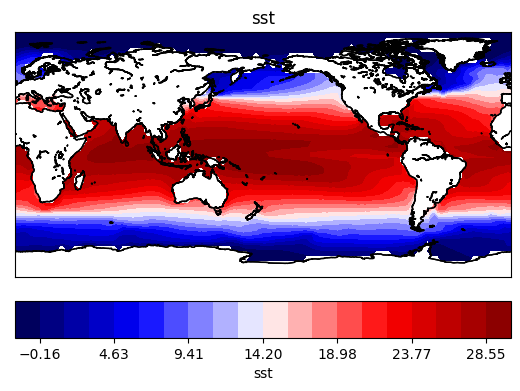

<Figure size 640x480 with 0 Axes>

In [37]:
plot_map(ds['lon'],ds['lat'],data.mean(axis=(0,1,2)),'file.png')